<a href="https://colab.research.google.com/github/ElcimarAires/Projetos-Pessoais/blob/main/ELT575_Semana2_118579.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNIVERSIDADE FEDERAL DE VIÇOSA**

POS-GRADUAÇÃO EM INTELIGENCIA ARTIFICIAL E COMPUTACIONAL

DISCIPLINA: ELT575 APRENDIZADO PROFUNDO

NOME: ELCIMAR AIRES DE BRITO

MATRÍCULA: 118579

In [1]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Importar o dataset CIFAR-10 usando o TensorFlow Datasets
dataset, info = tfds.load('cifar10', with_info=True, as_supervised=True)

# Separar em conjuntos de treinamento e teste
train_dataset, test_dataset = dataset['train'], dataset['test']

# Função para normalizar as imagens
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

# Aplicar a normalização ao conjunto de dados
train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Adicionar cache, shuffle e batch para o conjunto de treinamento
train_dataset = train_dataset.cache().shuffle(info.splits['train'].num_examples).batch(64).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(64).cache().prefetch(tf.data.experimental.AUTOTUNE)

# Criando um modelo básico de rede neural convolucional
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_dataset)
print(f'\nAcurácia no teste: {test_acc:.2f}')


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.HODOAZ_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.HODOAZ_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.3167 - loss: 1.8429 - val_accuracy: 0.4891 - val_loss: 1.4179
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5451 - loss: 1.2714 - val_accuracy: 0.5758 - val_loss: 1.1988
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6096 - loss: 1.1119 - val_accuracy: 0.6304 - val_loss: 1.0564
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6520 - loss: 0.9878 - val_accuracy: 0.6621 - val_loss: 0.9692
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6790 - loss: 0.9193 - val_accuracy: 0.6717 - val_loss: 0.9476
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7037 - loss: 0.8500 - val_accuracy: 0.6957 - val_loss: 0.8708
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7237 - loss: 0.7923 - val_accuracy: 0.6857 - val_loss: 0.8971
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7378 - loss: 0.7510 - val_accuracy: 0.7060 - val

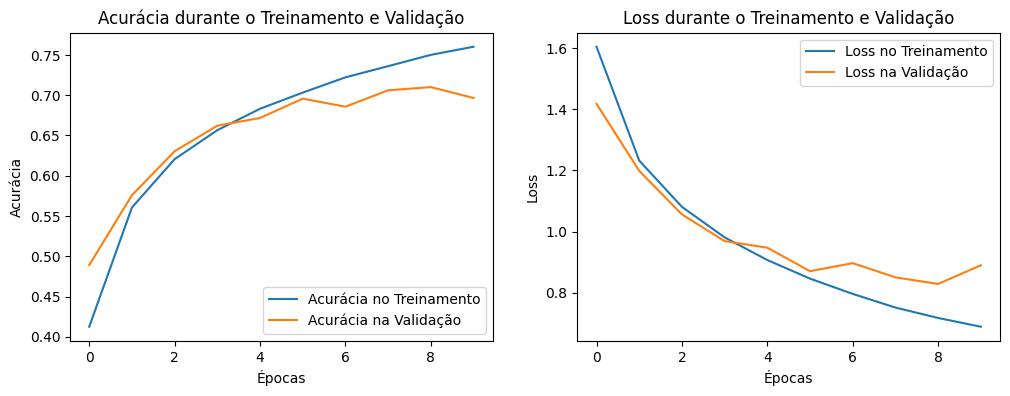

In [3]:
import matplotlib.pyplot as plt

# Plotando a acurácia
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.title('Acurácia durante o Treinamento e Validação')

# Plotando o loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss no Treinamento')
plt.plot(history.history['val_loss'], label='Loss na Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss durante o Treinamento e Validação')

# Mostrar os gráficos
plt.show()


Houve muita diferença no desempenho da rede treinada quando comparado ao exemplo? A resposta é SIM! No modelo treinado encontramos acurácia de 70% enquanto no modelo de exemplo foi conseguida uma acurácia bem maior. Continuaremos desenvolvendo o modelo conforme indicado na Atividade e veremos como será o resultado a partir da aplicação das alterações.

# **PARTE II DA ATIVIDADE**

Experimente adicionar mais dois blocos de camadas Conv2D (64 filtros 3x3 - relu) + MaxPooling (2 x 2) antes da camada Flatten e compare os resultados.

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3017 - loss: 1.8523 - val_accuracy: 0.5246 - val_loss: 1.2988
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5634 - loss: 1.1954 - val_accuracy: 0.6316 - val_loss: 1.0378
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6557 - loss: 0.9727 - val_accuracy: 0.6401 - val_loss: 1.0096
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6959 - loss: 0.8574 - val_accuracy: 0.6776 - val_loss: 0.9061
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7303 - loss: 0.7541 - val_accuracy: 0.7208 - val_loss: 0.8079
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7584 - loss: 0.6866 - val_accuracy: 0.7208 - val_loss: 0.8163
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7820 - loss: 0.6198 - val_accuracy: 0.7327 - val_loss: 0.7928
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8069 - loss: 0.5502 - val_accuracy: 0.

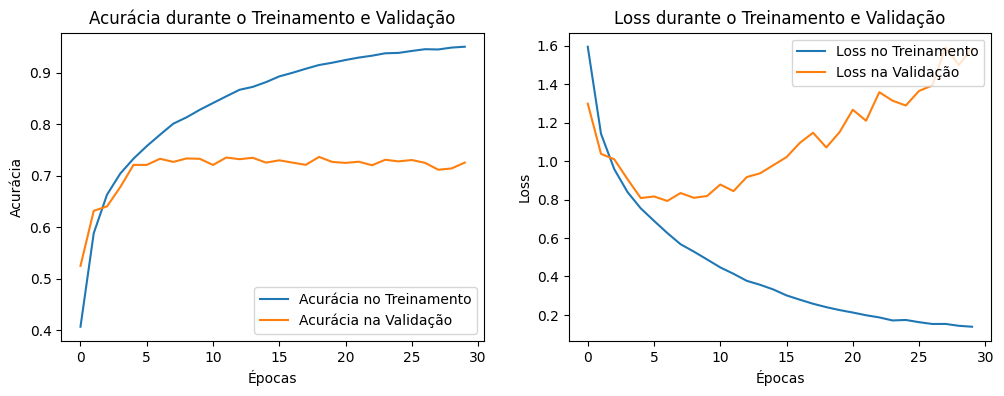

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Criando um modelo com mais camadas
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Adicionando mais dois blocos de camadas Conv2D + MaxPooling, ajustados
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_dataset, epochs=30, validation_data=test_dataset)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_dataset)
print(f'\nAcurácia no teste: {test_acc:.2f}')

# Plotando a acurácia e o loss
plt.figure(figsize=(12, 4))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.title('Acurácia durante o Treinamento e Validação')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss no Treinamento')
plt.plot(history.history['val_loss'], label='Loss na Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss durante o Treinamento e Validação')

plt.show()


A adição de camadas convolucionais e de pooling trouxe uma maior capacidade de extração de características, mas também aumentou a complexidade do modelo. A escolha de padding='same' ajudou a evitar a redução excessiva do tamanho da imagem, mas a arquitetura ainda pode precisar de mais ajustes para alcançar um desempenho ideal.

# ***PARTE III ***

Seguindo o modelo modificado no item anterior, experimente adicionar um Dropout de 20% após cada camada MaxPooling. Comente os resultados obtidos.

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.2074 - loss: 2.0742 - val_accuracy: 0.4505 - val_loss: 1.4854
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4282 - loss: 1.5609 - val_accuracy: 0.5289 - val_loss: 1.2851
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4917 - loss: 1.4052 - val_accuracy: 0.5754 - val_loss: 1.1811
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5346 - loss: 1.3034 - val_accuracy: 0.6145 - val_loss: 1.0755
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5739 - loss: 1.2134 - val_accuracy: 0.6437 - val_loss: 1.0350
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5975 - loss: 1.1584 - val_accuracy: 0.6432 - val_loss: 0.9966
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6153 - loss: 1.1081 - val_accuracy: 0.6709 - val_loss: 0.9360
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6275 - loss: 1.0747 - val_accuracy: 

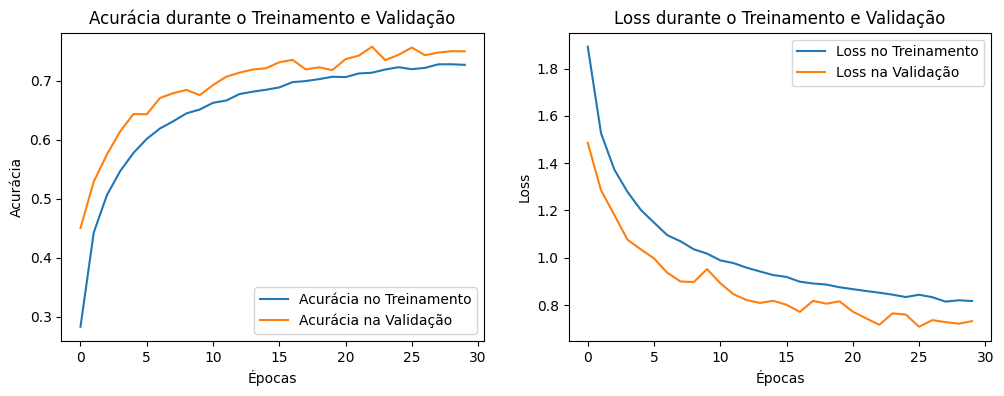

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Criando um modelo com Dropout após cada camada MaxPooling
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),  # Dropout após MaxPooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),  # Dropout após MaxPooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),  # Dropout após MaxPooling

    # Adicionando mais dois blocos de camadas Conv2D + MaxPooling com Dropout
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),  # Dropout após MaxPooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),  # Dropout após MaxPooling

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout na camada densa
    tf.keras.layers.Dense(10)
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_dataset, epochs=30, validation_data=test_dataset)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_dataset)
print(f'\nAcurácia no teste: {test_acc:.2f}')

# Plotando a acurácia e o loss
plt.figure(figsize=(12, 4))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.title('Acurácia durante o Treinamento e Validação')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss no Treinamento')
plt.plot(history.history['val_loss'], label='Loss na Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss durante o Treinamento e Validação')

plt.show()


Adicionando o dropout de 20% a cada camada Maxpooling chegamos a Acurácia de 75% na validação. Treinamento: O Dropout reduz a capacidade do modelo de se ajustar aos dados de treinamento, ajudando a evitar o overfitting. Isso pode resultar em uma maior diferença entre a acurácia no treinamento e a acurácia na validação. Se a acurácia no treinamento diminuir enquanto a acurácia na validação melhora, isso é um bom sinal de que o modelo está se generalizando melhor.  

Testando o modelo treinado com uma imagem salva localmente no meu PC (arquivo diferente do dataset CIFAR10) no meu caso, fiz o download do arquivo e fiz upload para que o modelo realizasse a previsão. O modelo identificou corretamente a imagem upada.

Saving cachorro.jpg to cachorro (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
Classe prevista: dog


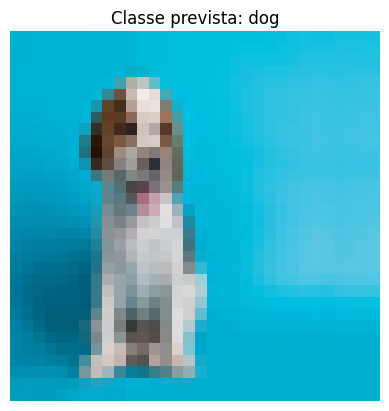

In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import io

# Função para carregar e pré-processar a imagem
def load_and_preprocess_image(image_file):
    # Abrir a imagem local
    image = Image.open(io.BytesIO(image_file))

    # Converter para RGB (se necessário)
    image = image.convert('RGB')

    # Redimensionar a imagem para 32x32 pixels (tamanho esperado pelo modelo)
    image = image.resize((32, 32))

    # Converter para array numpy e normalizar
    image_array = np.array(image) / 255.0  # Normalização para intervalo [0, 1]

    # Adicionar uma dimensão extra para o batch
    image_array = np.expand_dims(image_array, axis=0)

    return image_array

# Faça o upload da imagem
uploaded = files.upload()

# A imagem carregada está em uploaded['nome_do_arquivo']
# Pegue o nome do arquivo
filename = list(uploaded.keys())[0]
image_file = uploaded[filename]

# Carregar e pré-processar a imagem
image_array = load_and_preprocess_image(image_file)

# Fazer a previsão
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions, axis=1)

# Lista de classes CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = class_names[predicted_class[0]]
print(f'Classe prevista: {predicted_label}')

# Exibir a imagem e a previsão
plt.imshow(np.squeeze(image_array))
plt.title(f'Classe prevista: {predicted_label}')
plt.axis('off')
plt.show()


# **Conclusão Geral**
Modelo Inicial: O modelo básico de CNN forneceu uma base sólida, mas melhorias foram necessárias para alcançar melhores resultados.
Ajustes de Arquitetura: Adicionar mais camadas convolucionais e camadas de Dropout ajudou a melhorar a acurácia, mas com melhorias limitadas.
Testes de Imagem: A possibilidade de testar o modelo com imagens externas e locais é valiosa para avaliar o desempenho do modelo em dados não vistos durante o treinamento.